Week 2 - The Battle of Neighborhoods

1- Introduction


The restaurant industry in London is growing exponentially, every street is filled with every variety of restaurant, fast food place and pub; every type of food is available from classic European cuisines, primarily Italian, Spanish and French, to more exotic foods originating from Asia or South America. Demand, in the culinary industry, has become extremely high and as a result so has extent of competition to open a restaurant or cafeteria in a supposedly ‘cool’ area of the city.

2- Business Problem

A restaurant is a business which prepares and serves food and drink to customers in return for money, either paid before the meal, after the meal, or with an open account. The City of New York is famous for its excelllent cuisine. It's food culture includes an array of international cuisines influenced by the city's immigrant history.

Central and Eastern European immigrants, especially Jewish immigrants - bagels, cheesecake, hot dogs, knishes, and delicatessens
Italian immigrants - New York-style pizza and Italian cuisine
Jewish immigrants and Irish immigrants - pastrami and corned beef
Chinese and other Asian restaurants, sandwich joints, trattorias, diners, and coffeehouses are ubiquitous throughout the city
mobile food vendors - Some 4,000 licensed by the city
Middle Eastern foods such as falafel and kebabs examples of modern New York street food
It is famous for not just Pizzerias, Cafe's but also for fine dining Michelin starred restaurants.The city is home to "nearly one thousand of the finest and most diverse haute cuisine restaurants in the world", according to Michelin.
So it is evident that to survive in such competitive market it is very important to startegically plan. Various factors need to be studied inorder to decide on the Location such as :

New York Population
New York City Demographics
Are there any Farmers Markets, Wholesale markets etc nearby so that the ingredients can be purchased fresh to maintain quality and cost?
Are there any venues like Gyms, Entertainmnet zones, Parks etc nearby where floating population is high etc
Who are the competitors in that location?
Cuisine served / Menu of the competitors
Segmentation of the Borough
Untapped markets
Saturated markets etc
The list can go on...
Eventhough well funded XYZ Company Ltd. need to choose the correct location to start its first venture.If this is successful they can replicate the same in other locations. First move is very important, thereby choice of location is very important.

3- Target Audience:

To recommend the correct location, XYZ Company Ltd has appointed me to lead of the Data Science team. The objective is to locate and recommend to the management which neighborhood of Newyork city will be best choice to start a restaurant. The Management also expects to understand the rationale of the recommendations made.

This would interest anyone who wants to start a new restaurant in Newyork city.

4- Data section

I have Collected some infomation of the popluar places that people visit in London from Google.
To this project, we will use two csv files containing the main locations of the restaurnts of London. Each csv file contains 4 columns: ID, Name, Latitude and Longitude of the main points of the city.

Location Points using FourSquare

In [6]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

done
Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [21]:
def geo_location(london):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(london)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [22]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = '########################################' 
    CLIENT_SECRET = '##################################' 
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    print("done")
    return df

In [24]:
def get_venue_details(venue_id):
        
    CLIENT_ID = '###########################' # i have changed the id with ##
    CLIENT_SECRET = '############################' # i have changed the secret with ##
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [25]:
def get_london_data():
    url='https://cocl.us/london_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return london_data

In [26]:
london_data=get_london()
london_data.head()

NameError: name 'get_london' is not defined

In [27]:
london.shape

NameError: name 'london' is not defined

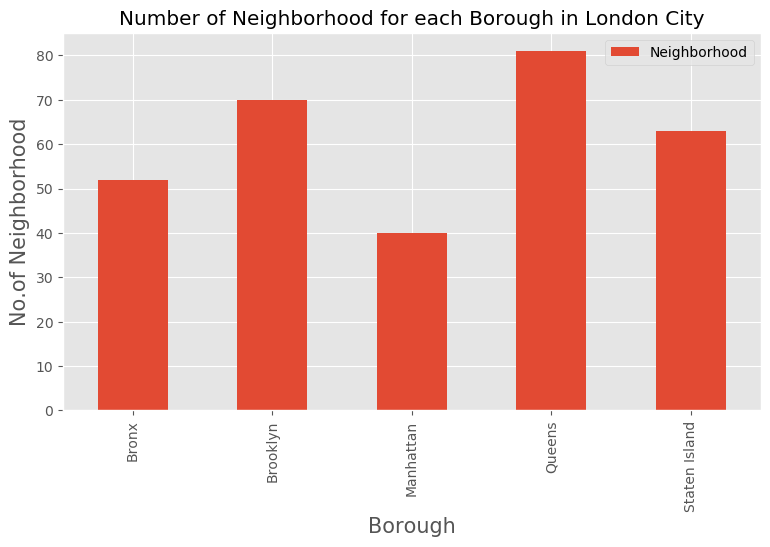

In [29]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in London City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [30]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in london_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(new_york_data),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

NameError: name 'london_data' is not defined

In [31]:
indian_rest_ny.head()

,Borough,Neighborhood,ID,Name


In [32]:
indian_rest_ny.shape

(0, 4)

IndexError: index 0 is out of bounds for axis 0 with size 0

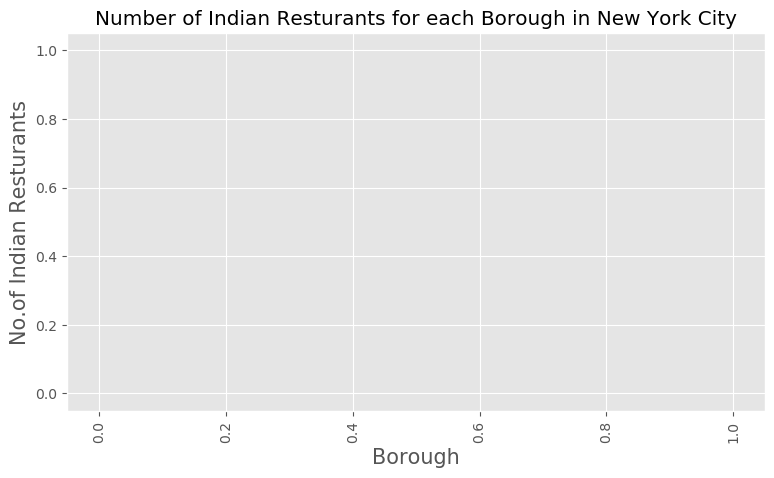

In [33]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

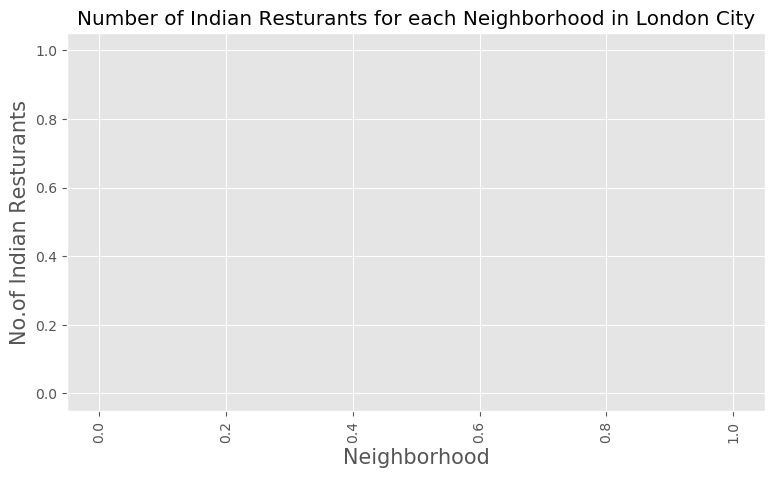

In [34]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Neighborhood in London City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [35]:
indian_rest_ny[indian_rest_ny['Neighborhood']=='Floral Park']

,Borough,Neighborhood,ID,Name


In [36]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

In [37]:
indian_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips


In [38]:
indian_rest_stats_ny.shape

(0, 7)

In [39]:
indian_rest_ny.shape

(0, 4)

In [40]:
indian_rest_stats_ny.to_csv('indian_rest_stats_ny.csv', index=False)

In [41]:
indian_rest_stats_ny_csv=pd.read_csv('indian_rest_stats_ny.csv')

In [42]:
indian_rest_stats_ny_csv.shape


(0, 7)

In [43]:
indian_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips


In [44]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Borough       0 non-null      object
 1   Neighborhood  0 non-null      object
 2   ID            0 non-null      object
 3   Name          0 non-null      object
 4   Likes         0 non-null      object
 5   Rating        0 non-null      object
 6   Tips          0 non-null      object
dtypes: object(7)
memory usage: 0.0+ bytes


In [47]:
indian_rest_stats_ny['Likes']=indian_rest_stats_ny['Likes'].astype('float64')

In [48]:
indian_rest_stats_ny['Tips']=indian_rest_stats_ny['Tips'].astype('float64')

In [49]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       0 non-null      object 
 1   Neighborhood  0 non-null      object 
 2   ID            0 non-null      object 
 3   Name          0 non-null      object 
 4   Likes         0 non-null      float64
 5   Rating        0 non-null      object 
 6   Tips          0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 0.0+ bytes


In [50]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]

ValueError: attempt to get argmax of an empty sequence

In [51]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax()]

TypeError: reduction operation 'argmax' not allowed for this dtype

In [53]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Tips'].idxmax()]

ValueError: attempt to get argmax of an empty sequence

In [54]:

ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

KeyError: "['Rating'] not in index"

In [55]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

NameError: name 'ny_neighborhood_stats' is not defined

In [56]:

ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

KeyError: "['Rating'] not in index"

In [57]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()


NameError: name 'ny_borough_stats' is not defined

KeyError: 'Rating'

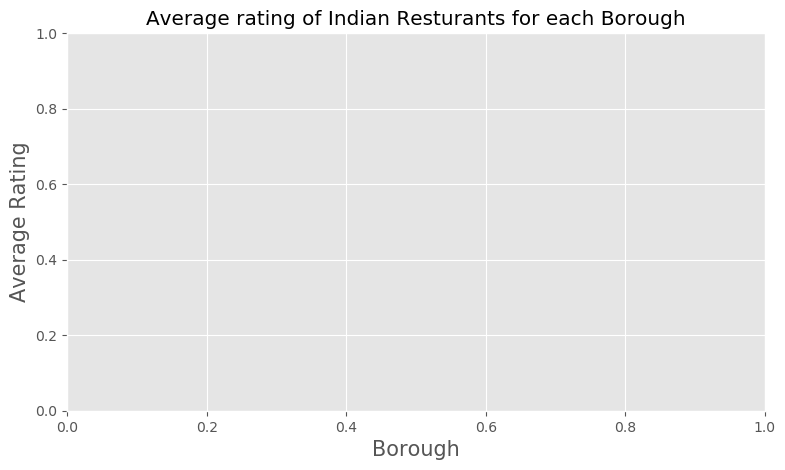

In [58]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Indian Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [59]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=9.0

SyntaxError: unexpected EOF while parsing (<ipython-input-59-de9a546e2b40>, line 1)

In [60]:
ny_neighborhood_stats

NameError: name 'ny_neighborhood_stats' is not defined

In [61]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')


NameError: name 'ny_neighborhood_stats' is not defined

In [62]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]


NameError: name 'ny_neighborhood_stats' is not defined

In [63]:
ny_neighborhood_stats

NameError: name 'ny_neighborhood_stats' is not defined

In [64]:
ny_map = folium.Map(location=geo_location('London'), zoom_start=12)

In [65]:
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

NameError: name 'ny_neighborhood_stats' is not defined

In [66]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')

SyntaxError: EOL while scanning string literal (<ipython-input-66-098c689c76f9>, line 1)

In [67]:
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

NameError: name 'ny_neighborhood_stats' is not defined

In [68]:
ny_map = folium.Map(location=geo_location('London'), zoom_start=12)
ny_geo = r'Borough Boundaries.geojson'

ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)

# display map
# as this is huge map data , we will save it to a file
ny_map.save('borough_rating.html')

NameError: name 'ny_borough_stats' is not defined